In [1]:
#package prince https://github.com/MaxHalford/prince
#MCA multiple correspondance analysis
#three or more categorical features

In [2]:
#Importing the necessary package
import pandas as pd
import numpy as np
from prince import MCA#Dataset preparation with only numerical features
df = pd.read_csv('SurveyAnswers4ClusteringUpdated2023_ALLCATEGORICAL.csv')
print(len(df))
print(len(df.columns))
df

11
36


,CDR_name,rest_api,another_api,gui,comp_crud_api,ehr_cr_api,store_list_get_templates_api,store_list_exec_query_api,comp_crud_gui,ehr_cr_gui,...,fhir_import,demographics_openehr,rest_api_openehr,gdl,form_creation,terminology_server,archetype_designer,template_designer,aql,sql
0,ehrbase,y,y,y,y,y,y,y,n,n,...,y,n,y,n,n,y,n,n,y,n
1,better,y,y,y,y,y,y,y,y,n,...,y,n,y,y,y,y,y,y,y,n
2,base24,y,y,y,y,y,y,y,y,y,...,y,y,n,n,y,y,n,n,n,n
3,cabo,y,y,y,y,y,all but store,y not store,only r,y,...,ext,n,dev,n,n,n,n,n,n,n
4,arenaehr,y,n,y,y,y,y,y,n,n,...,y,n,y,y,y,y,n,n,y,n
5,eweave,n,n,y,n,n,n,n,y,y,...,n,y,n,n,y,y,n,y,y,y
6,ehrcare,y,y,n,y,y,y,y not store,n,n,...,n,y,n,n,y,n,n,n,y,n
7,clever,y,y,y,y,y,y,y,n,y,...,n,y,n,y,y,dev,y,y,n,y
8,ehrdb,y,y,y,y,y,y,y,y,n,...,n,n,y,n,y,n,y,y,y,n
9,rhp,y,y,y,y,y,y,y,n,y,...,n,y,n,y,y,y,y,y,n,y


In [3]:
df=df.set_index('CDR_name')
df

,rest_api,another_api,gui,comp_crud_api,ehr_cr_api,store_list_get_templates_api,store_list_exec_query_api,comp_crud_gui,ehr_cr_gui,store_list_get_templates_gui,...,fhir_import,demographics_openehr,rest_api_openehr,gdl,form_creation,terminology_server,archetype_designer,template_designer,aql,sql
CDR_name,,,,,,,,,,,,,,,,,,,,,
ehrbase,y,y,y,y,y,y,y,n,n,n,...,y,n,y,n,n,y,n,n,y,n
better,y,y,y,y,y,y,y,y,n,y,...,y,n,y,y,y,y,y,y,y,n
base24,y,y,y,y,y,y,y,y,y,y,...,y,y,n,n,y,y,n,n,n,n
cabo,y,y,y,y,y,all but store,y not store,only r,y,y,...,ext,n,dev,n,n,n,n,n,n,n
arenaehr,y,n,y,y,y,y,y,n,n,n,...,y,n,y,y,y,y,n,n,y,n
eweave,n,n,y,n,n,n,n,y,y,y,...,n,y,n,n,y,y,n,y,y,y
ehrcare,y,y,n,y,y,y,y not store,n,n,n,...,n,y,n,n,y,n,n,n,y,n
clever,y,y,y,y,y,y,y,n,y,y,...,n,y,n,y,y,dev,y,y,n,y
ehrdb,y,y,y,y,y,y,y,y,n,y,...,n,n,y,n,y,n,y,y,y,n


In [4]:
#replace all dev with no
df.replace("dev","n",inplace=True)
df.replace("only r","n",inplace=True)
df.replace("all but store","y",inplace=True)
df.replace("ext","y",inplace=True)
df.replace('y not store','y',inplace=True)
df

,rest_api,another_api,gui,comp_crud_api,ehr_cr_api,store_list_get_templates_api,store_list_exec_query_api,comp_crud_gui,ehr_cr_gui,store_list_get_templates_gui,...,fhir_import,demographics_openehr,rest_api_openehr,gdl,form_creation,terminology_server,archetype_designer,template_designer,aql,sql
CDR_name,,,,,,,,,,,,,,,,,,,,,
ehrbase,y,y,y,y,y,y,y,n,n,n,...,y,n,y,n,n,y,n,n,y,n
better,y,y,y,y,y,y,y,y,n,y,...,y,n,y,y,y,y,y,y,y,n
base24,y,y,y,y,y,y,y,y,y,y,...,y,y,n,n,y,y,n,n,n,n
cabo,y,y,y,y,y,y,y,n,y,y,...,y,n,n,n,n,n,n,n,n,n
arenaehr,y,n,y,y,y,y,y,n,n,n,...,y,n,y,y,y,y,n,n,y,n
eweave,n,n,y,n,n,n,n,y,y,y,...,n,y,n,n,y,y,n,y,y,y
ehrcare,y,y,n,y,y,y,y,n,n,n,...,n,y,n,n,y,n,n,n,y,n
clever,y,y,y,y,y,y,y,n,y,y,...,n,y,n,y,y,n,y,y,n,y
ehrdb,y,y,y,y,y,y,y,y,n,y,...,n,n,y,n,y,n,y,y,y,n


In [5]:
#df.drop(['terminology_server','gdl',
#        'archetype_designer','template_designer',
#        'ex_comp_from_temp','openehr_extract',
#        'comp_in_struct','comp_in_can_xml','comp_in_can_json',
#         'comp_ou_flat','comp_ou_struct','comp_ou_can_xml','comp_ou_can_json',
#         'java_api','temp_in_opt','temp_in_webtemp','temp_ou_opt','temp_ou_webtemp',
#         'ehr_cr_api','ehr_cr_gui','comp_crud_api','comp_crud_gui','store_list_get_templates_api',
#         'store_list_get_templates_gui','store_list_exec_query_api','store_list_exec_query_gui',
#         'api_n','gui_n','api_2of','gui_2of',
#         'oauth2'],axis=1,inplace=True)
#df

In [6]:
df.shape

(11, 35)

In [7]:
mca = MCA(n_components = 2, n_iter = 3, random_state = 101)
mca.fit(df)
df_mca = mca.transform(df)
df_mca

,0,1
ehrbase,-0.689915,-0.115578
better,-0.479820,0.411782
base24,-0.187985,-0.267989
cabo,-0.310441,-0.255061
arenaehr,-0.472037,-0.240239
eweave,1.184924,-0.755702
ehrcare,-0.079845,-0.108734
clever,0.676379,0.758554
ehrdb,-0.368416,0.366045
rhp,0.662413,0.619138


In [8]:
mca.explained_inertia_ #variance explained

[0.31885090921698955, 0.20209695984715448]

In [9]:
round(sum(mca.explained_inertia_)*100,1)

52.1

In [10]:
 mca.eigenvalues_

[0.31885090921698955, 0.20209695984715448]

In [11]:
mca.column_coordinates(df)

,0,1
rest_api_n,2.098440,-1.681012
rest_api_y,-0.209844,0.168101
another_api_n,0.459048,-1.044119
another_api_y,-0.172143,0.391545
gui_n,-0.141402,-0.241871
...,...,...
template_designer_y,0.593438,0.622761
aql_n,0.372061,0.475274
aql_y,-0.212607,-0.271585
sql_n,-0.654861,-0.066661


<AxesSubplot:title={'center':'Row and column principal coordinates'}, xlabel='Component 0 (31.89% inertia)', ylabel='Component 1 (20.21% inertia)'>

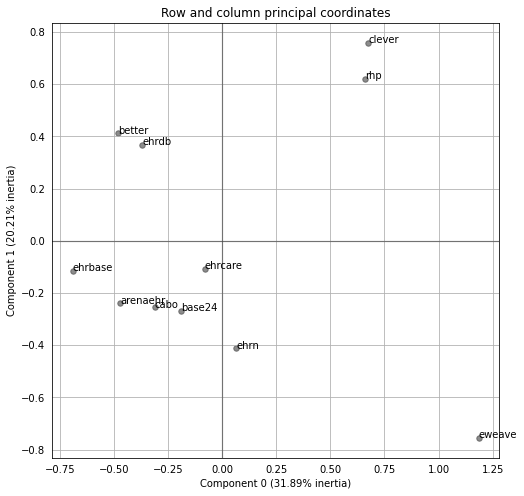

In [12]:
#The result is like the PCA or CA result, two principal components with SVD result as the values. Just like previous techniques, we could plot the coordinates into a two-dimension graph.
mca.column_coordinates(df)
mca.plot_coordinates(X =df,figsize=(8,8),show_row_points=True,show_row_labels=True, 
                     show_column_points=False, show_column_labels=False,
                    row_points_size=30, column_points_size=30)

In [13]:
mca = MCA(n_components = 3, n_iter = 3, random_state = 101)
mca.fit(df)
df_mca = mca.transform(df)
df_mca

,0,1,2
ehrbase,-0.689915,-0.115578,-0.238357
better,-0.479820,0.411782,-0.482069
base24,-0.187985,-0.267989,0.424614
cabo,-0.310441,-0.255061,0.541717
arenaehr,-0.472037,-0.240239,-0.054270
eweave,1.184924,-0.755702,-0.465188
ehrcare,-0.079845,-0.108734,0.326036
clever,0.676379,0.758554,0.195918
ehrdb,-0.368416,0.366045,-0.428138
rhp,0.662413,0.619138,0.170634


In [14]:
print(df_mca.iloc[0,2])
index=df_mca.index
print(index[0])

-0.23835673954649625
ehrbase


In [15]:
mca.explained_inertia_ #variance explained

[0.31885090921698966, 0.20209695984715492, 0.1217715747126417]

In [16]:
round(sum(mca.explained_inertia_)*100,1)

64.3

In [17]:
 mca.eigenvalues_

[0.31885090921698966, 0.20209695984715492, 0.1217715747126417]

In [18]:
mca.column_coordinates(df)

,0,1,2
rest_api_n,2.098440,-1.681012,-1.333077
rest_api_y,-0.209844,0.168101,0.133308
another_api_n,0.459048,-1.044119,-0.487505
another_api_y,-0.172143,0.391545,0.182814
gui_n,-0.141402,-0.241871,0.934312
...,...,...,...
template_designer_y,0.593438,0.622761,-0.578203
aql_n,0.372061,0.475274,0.954903
aql_y,-0.212607,-0.271585,-0.545659
sql_n,-0.654861,-0.066661,0.036654


In [19]:
newtextpos=df_mca.copy()
newtextpos.iloc[1,2]=-0.49
newtextpos.iloc[0,2]=-0.25
print(f'len(df_mca)={len(df_mca)}')
for i in range(len(df_mca)):
    print(df_mca.iloc[i,0],df_mca.iloc[i,1],df_mca.iloc[i,2])
    print(newtextpos.iloc[i,0],newtextpos.iloc[i,1],newtextpos.iloc[i,2])
print(df_mca.shape)
print(newtextpos.shape)


len(df_mca)=11
-0.6899145876680328 -0.11557762094037882 -0.23835673954649625
-0.6899145876680328 -0.11557762094037882 -0.25
-0.47982014169753134 0.41178181116889984 -0.4820685604391836
-0.47982014169753134 0.41178181116889984 -0.49
-0.1879846506014987 -0.26798886276755335 0.4246137397650314
-0.1879846506014987 -0.26798886276755335 0.4246137397650314
-0.31044089786173196 -0.25506101787605867 0.5417173326389915
-0.31044089786173196 -0.25506101787605867 0.5417173326389915
-0.4720366299083768 -0.24023871914454747 -0.05426951248495062
-0.4720366299083768 -0.24023871914454747 -0.05426951248495062
1.1849235285036164 -0.7557021490308746 -0.4651877271861049
1.1849235285036164 -0.7557021490308746 -0.4651877271861049
-0.07984549951825795 -0.10873359683269983 0.32603562265757297
-0.07984549951825795 -0.10873359683269983 0.32603562265757297
0.6763787786957578 0.7585536175133627 0.19591831156197653
0.6763787786957578 0.7585536175133627 0.19591831156197653
-0.3684161357986891 0.3660449291115158 -0.42

<IPython.core.display.Javascript object>


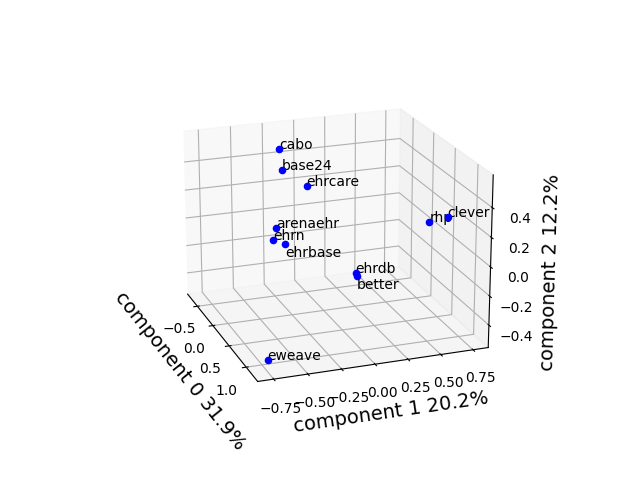

In [79]:
%matplotlib notebook
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


from matplotlib import interactive,pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure

 
m=rand(3,3) # m is an array of (x,y,z) coordinate triplets
 
fig = figure()
ax = fig.add_subplot(projection='3d')

newtextpos=df_mca.iloc[i]



for i in range(len(df_mca)): #plot each point + its index as text above
    if i==1 or i==0:
        delta=-0.1
    else:
        delta=0.
    ax.scatter(df_mca.iloc[i,0],df_mca.iloc[i,1],df_mca.iloc[i,2],color='b') 
    ax.text(df_mca.iloc[i,0],df_mca.iloc[i,1],df_mca.iloc[i,2]+delta,  '%s' % (index[i]), size=10, zorder=1,  
    color='k') #size 20

ax.set_xlabel(f'component 0 {round(mca.explained_inertia_[0]*100,1)}%', fontsize=14)
ax.set_ylabel(f'component 1 {round(mca.explained_inertia_[1]*100,1)}%', fontsize=14)
ax.set_zlabel(f'component 2 {round(mca.explained_inertia_[2]*100,1)}%', fontsize=14)
ax.view_init(20., -20.)

plt.show()
plt.savefig('DimensionsReductionSurvey2023_MCA_ALLVAR_1000dpi.pdf',dpi=1000,format='pdf')
plt.savefig('DimensionsReductionSurvey2023_MCA_ALLVAR_1000dpi.tiff',dpi=1000,format='tiff')





In [78]:
import plotly.express as px
from sklearn.decomposition import PCA

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(mca.explained_inertia_ * 100)
}

fig = px.scatter_matrix(
    df_mca,
    labels=labels,
    dimensions=range(3),
    color=df_mca.index
)
fig.update_traces(diagonal_visible=False)
fig.show()
fig.write_image('DimensionsReductionSurvey2023_MCA_ALLVAR_2dplots_1000dpi.pdf',scale=2)
fig.write_image('DimensionsReductionSurvey2023_MCA_ALLVAR_2dplots_1000dpi.jpeg',scale=13)
